# Multiple Regression
> Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

## Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


## Try dependent as median house value, and 2 independent variables

### Prepare independent variable

In [4]:
X = np.array(df[['total_rooms', 'median_income']]).reshape(-1,2)

### Prepare dependent variable

In [5]:
y = np.array(df['total_bedrooms']).reshape(-1, 1)

### Split train and test data

In [6]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

### Train the model

In [7]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
model = reg.fit(X_train, y_train)

In [8]:
model.coef_, model.intercept_

(array([[  0.18680123, -44.86926146]]), array([220.34583534]))

### Evaluate the model

In [10]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE: {} MSE: {} RMSE: {} R^2 {}'.format(mae, mse, rmse, r2))

MAE: 80.07013751377826 MSE: 15445.790868321968 RMSE: 15445.790868321968 R^2 0.8979730088390411


### Visualiza your result

Text(0, 0.5, 'y-actual')

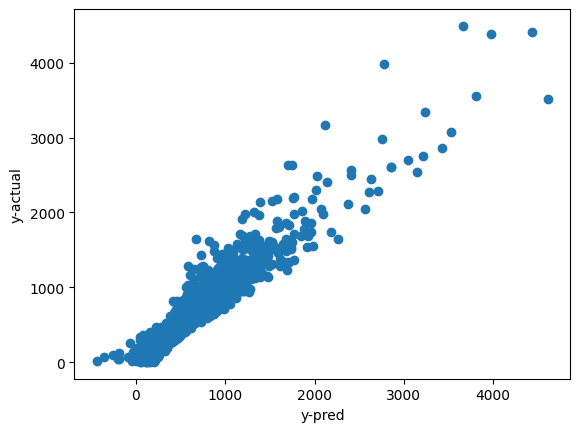

In [11]:
plt.scatter(y_pred, y_test)
plt.xlabel('y-pred')
plt.ylabel('y-actual')

## Try with more independent variables

### Prepare independent variable

In [12]:
X = np.array(df[['housing_median_age',
                 'total_rooms',
                 'population',
                 'households',
                 'median_income',
                 'median_house_value']]).reshape(-1,6)

### Prepare dependent variable

In [13]:
y = np.array(df['total_bedrooms']).reshape(-1, 1)

### Split train and test data

In [14]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

### Train the model

In [15]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
model = reg.fit(X_train, y_train)

In [16]:
model.coef_, model.intercept_

(array([[-5.74566074e-01,  5.82865556e-02, -3.30278196e-02,
          8.55766781e-01, -2.19670063e+01,  9.56722245e-05]]),
 array([85.51538819]))

### Evaluate the model

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE: {} MSE: {} RMSE: {} R^2 {}'.format(mae, mse, rmse, r2))

MAE: 38.66434010856269 MSE: 4435.147006727537 RMSE: 4435.147006727537 R^2 0.9728897547697994


### Visualiza your result

Text(0, 0.5, 'y-actual')

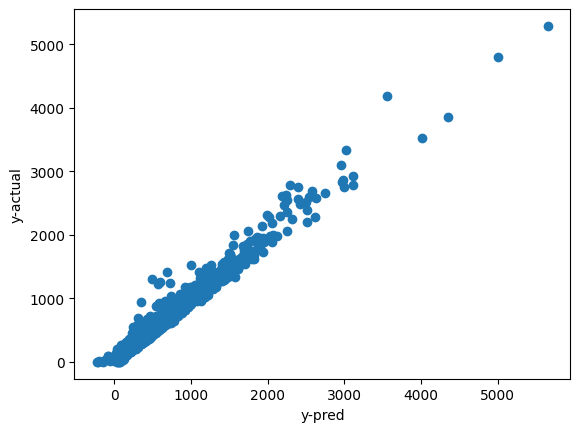

In [19]:
plt.scatter(y_pred, y_test)
plt.xlabel('y-pred')
plt.ylabel('y-actual')